<a href="https://colab.research.google.com/github/dayudyah20/Belajar-Coursera/blob/main/Model_Normal_Diabetes_Baruipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Orang Normal

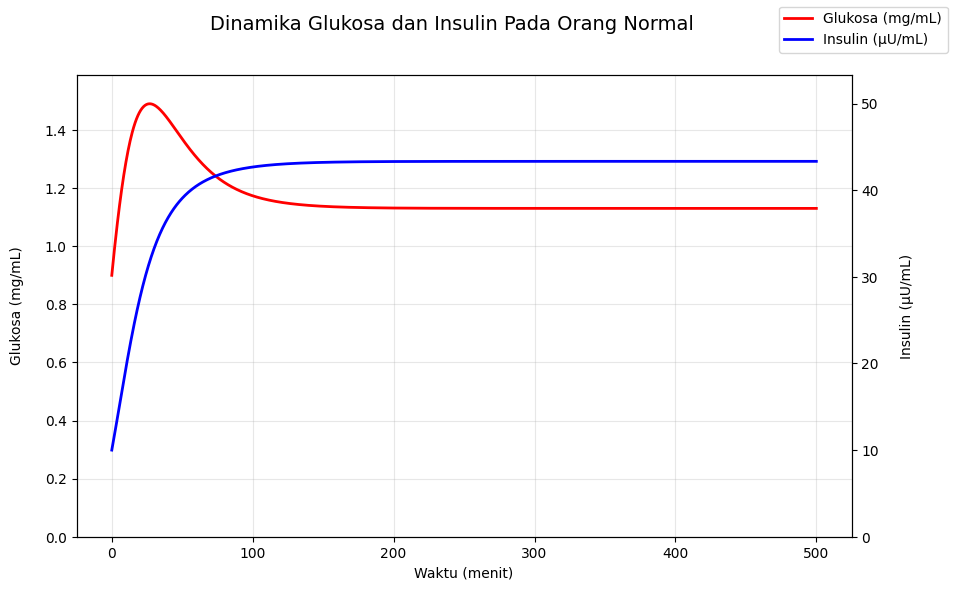

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi fungsi untuk sistem persamaan
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
    dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter-parameter
alpha = 6.5    # Penerimaan glukosa
gamma = 0.0055 # Penggunaan glukosa tanpa insulin
theta = 0.0012 # Pengaruh insulin pada glukosa
delta = 0.013  # Sekresi insulin dari glukosa
beta = 0.0003  # Clearance insulin

# Waktu simulasi
t = np.linspace(0, 500, 1000)

# Kondisi awal [Glukosa (G), Insulin (I)]
z0 = [90, 10]

# Simulasi dengan parameter baru
params = (alpha, gamma, theta, delta, beta)
z_adjusted_slightly_higher_glucose = runge_kutta_4(f, z0, t, params)

# Ekstrak Glukosa dan Insulin
glucose = z_adjusted_slightly_higher_glucose[:, 0]  # Ambil nilai glukosa
insulin = z_adjusted_slightly_higher_glucose[:, 1]  # Ambil nilai insulin

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)

# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
ax1.grid(alpha=0.3)

plt.show()

Model DM1 TK 1 I=0

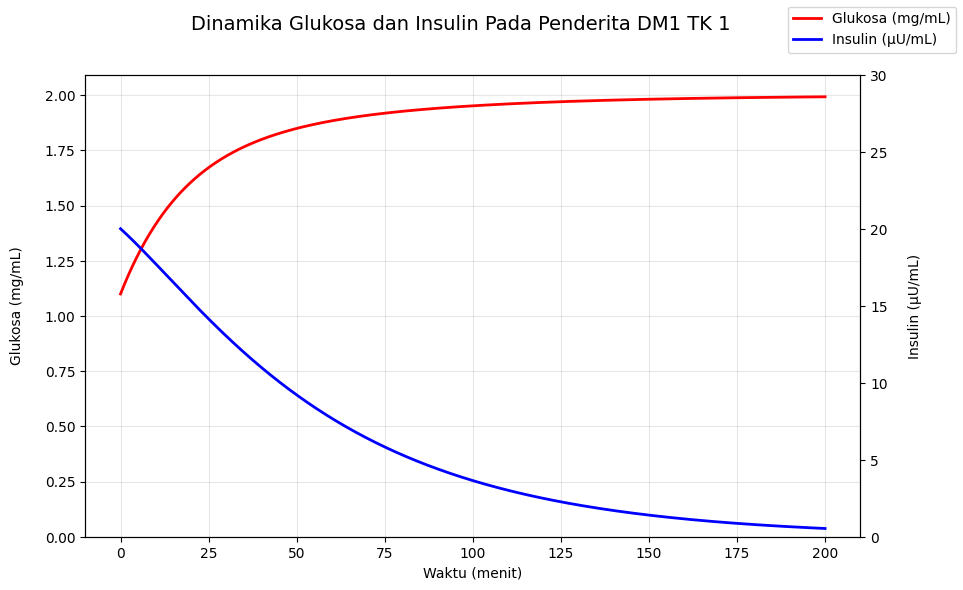

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 10  # Penerimaan glukosa
gamma = 0.05  # Penggunaan glukosa
theta = 0.0002  # Pengaruh insulin
sigma = 0.0006  # Efektivitas insulin
epsilon = 0.001  # Tingkat kejenuhan
beta = 0.0001  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([110.0, 20.0])  # Glukosa mulai dari 110 mg/dL, Insulin mulai dari 20 μU/ml

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)  # Hingga 200 menit

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14)
ax1.grid(alpha=0.3)

plt.show()

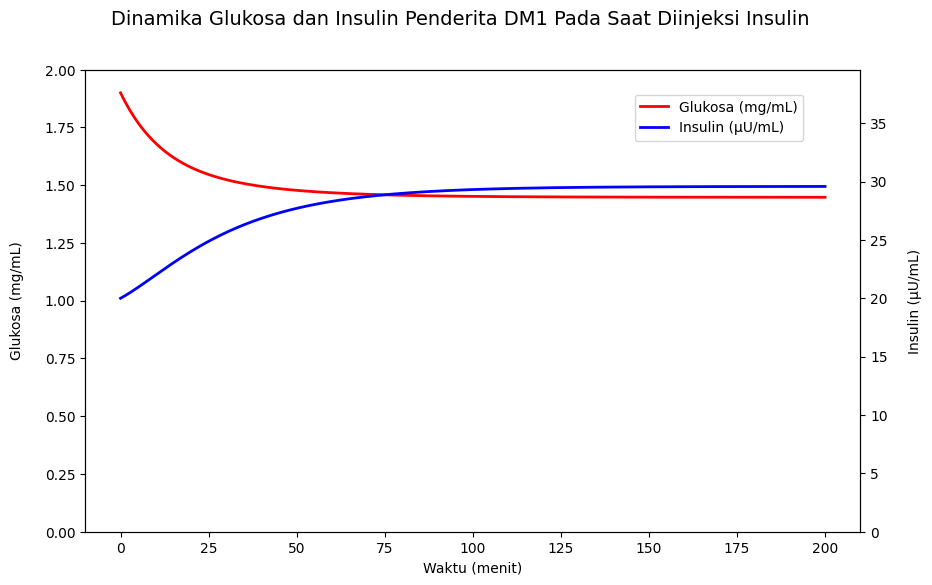

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/mL/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter-Parameter
alpha = 13      #Penerimaan glukosa
gamma = 0.075   #Penggunaan glukosa tanpa keterlibatan insulin
theta = 0.0005  #Penggunaan glukosa tergantung pada insulin
sigma = 1.6     #Efektivitas atau efisiensi dari insulin yang diberikan melalui injeksi insulin
beta = 0.0004   #Laju clearance insulin
epsilon = 0.9   #Tingkat kejenuhan dalam respon insulin terhadap glukosa

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)

# Kondisi awal
z0 = np.array([190.0, 20.0])  # Glukosa (mg/dL) dan Insulin (μU/mL)

# Simulasi
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)

# Tambahkan garis vertikal di sumbu Y kanan
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('black')

# Tambahkan legenda
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))

# Tambahkan judul
fig.suptitle('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)

plt.show()

**PERCOBAAN MODEL INJEKSI INSULIN YANG DI JURNAL (NILAI PARAMETER SESUAI JURNAL)**

GAMBAR SEHARUSNYA

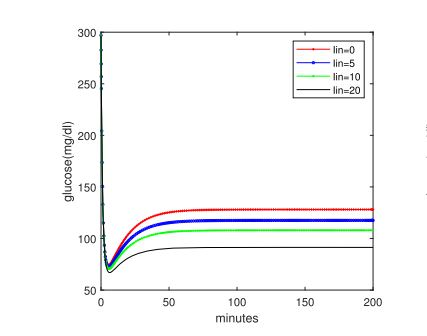

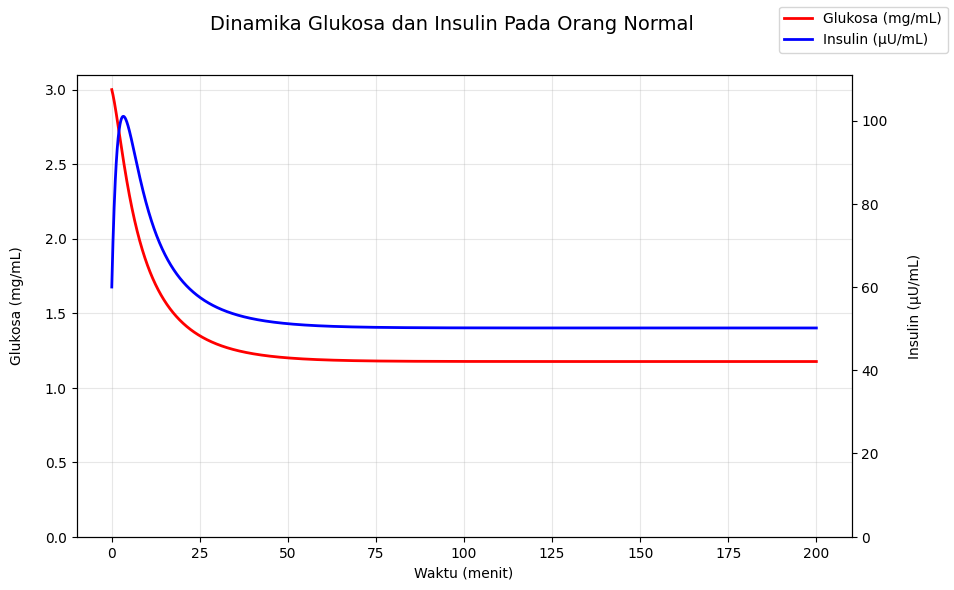

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi fungsi untuk sistem persamaan dengan model non-linier
def f(z, t, Gin, a, b, In, c, d, e):
    G, I = z
    dGdt = Gin - a* G - (b * G * I)  # Pengaruh insulin terhadap glukosa
    dIdt = In + c* G - (d*I / (e+I))         # Sekresi insulin menggunakan Michaelis-Menten
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z


Gin = 4.5   # Penerimaan glukosa
In = 5 #Injeksi insulin (Perbedaan di model skripsi)
a= 0.0002 # Penggunaan glukosa tanpa insulin
b = 0.00075919 # pengaruh insulin pada glukosa
c = 0.2298  # Sekresi insulin dari glukosa
d = 1500  # Clearance insulin
e = 2300 #saturasi (Menggunakan )

# Kondisi awal [Glukosa (G), Insulin (I)]
z0 = [300, 60]

# Waktu simulasi
t = np.linspace(0, 200, 3000)

# Simulasi dengan parameter yang disesuaikan
params = (Gin, a, b, In, c, d, e)
z_normal_adjusted = runge_kutta_4(f, z0, t, params)

# Ekstrak Glukosa dan Insulin
glucose_normal_adjusted = z_normal_adjusted[:, 0]  # Ambil nilai glukosa
insulin_normal_adjusted = z_normal_adjusted[:, 1]  # Ambil nilai insulin


# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose_normal_adjusted / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin_normal_adjusted, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin_normal_adjusted) + 10)

# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada DM1 Injeksi Insulin', fontsize=14)
ax1.grid(alpha=0.3)

plt.show()

PERCOBAAN MODEL ORANG NORMAL PAKAI DATA NILAI JURNAL

<ipython-input-25-b36fc30154e9>:7: RuntimeWarning: overflow encountered in scalar multiply
  dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
<ipython-input-25-b36fc30154e9>:8: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
<ipython-input-25-b36fc30154e9>:7: RuntimeWarning: invalid value encountered in scalar subtract
  dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan


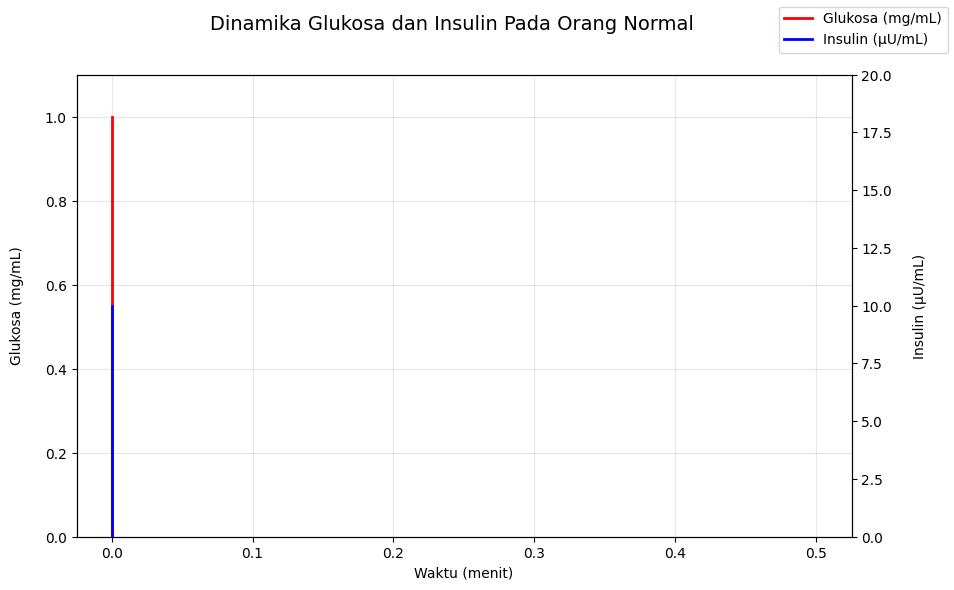

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi fungsi untuk sistem persamaan
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
    dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter-parameter
alpha = 4.5    # Penerimaan glukosa
gamma = 0.0002 # Penggunaan glukosa tanpa insulin
theta = 0.00075919 # Pengaruh insulin pada glukosa
delta = 0.2298 # Sekresi insulin dari glukosa
beta = 1500  # Clearance insulin

# Waktu simulasi
t = np.linspace(0, 500, 1000)

# Kondisi awal [Glukosa (G), Insulin (I)]
z0 = [100, 10]

# Simulasi dengan parameter baru
params = (alpha, gamma, theta, delta, beta)
z_adjusted_slightly_higher_glucose = runge_kutta_4(f, z0, t, params)

# Ekstrak Glukosa dan Insulin
glucose = z_adjusted_slightly_higher_glucose[:, 0]  # Ambil nilai glukosa
insulin = z_adjusted_slightly_higher_glucose[:, 1]  # Ambil nilai insulin

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)

# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
ax1.grid(alpha=0.3)

plt.show()

PERCOBAAN MODEL DM1 PAKAI DATA NILAI JURNAL

<ipython-input-27-4cbf0973bb98>:16: RuntimeWarning: overflow encountered in scalar multiply
  dGdt = alpha - gamma * G - theta * G * I
<ipython-input-27-4cbf0973bb98>:18: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
<ipython-input-27-4cbf0973bb98>:16: RuntimeWarning: invalid value encountered in scalar subtract
  dGdt = alpha - gamma * G - theta * G * I
<ipython-input-27-4cbf0973bb98>:18: RuntimeWarning: invalid value encountered in scalar divide
  dIdt = sigma * I / (1 + epsilon * I) - beta * I * G


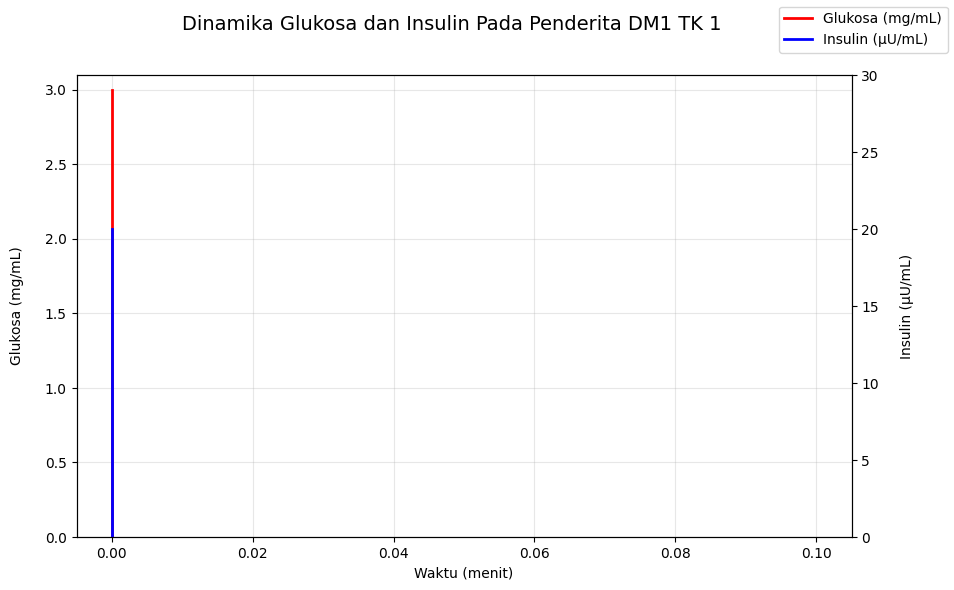

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 4.5  # Penerimaan glukosa
gamma = 0.0002  # Penggunaan glukosa
theta = 0.00075919 # Pengaruh insulin
sigma = 0.2298  # Efektivitas insulin
epsilon = 2300 # Tingkat kejenuhan
beta = 1500  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([300.0, 20.0])  # Glukosa mulai dari 110 mg/dL, Insulin mulai dari 20 μU/ml

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)  # Hingga 200 menit

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14)
ax1.grid(alpha=0.3)

plt.show()

MENCOBA-COBA NILAI

<ipython-input-29-5c69ba2e2c1a>:7: RuntimeWarning: overflow encountered in scalar multiply
  dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
<ipython-input-29-5c69ba2e2c1a>:8: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
<ipython-input-29-5c69ba2e2c1a>:7: RuntimeWarning: invalid value encountered in scalar subtract
  dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan


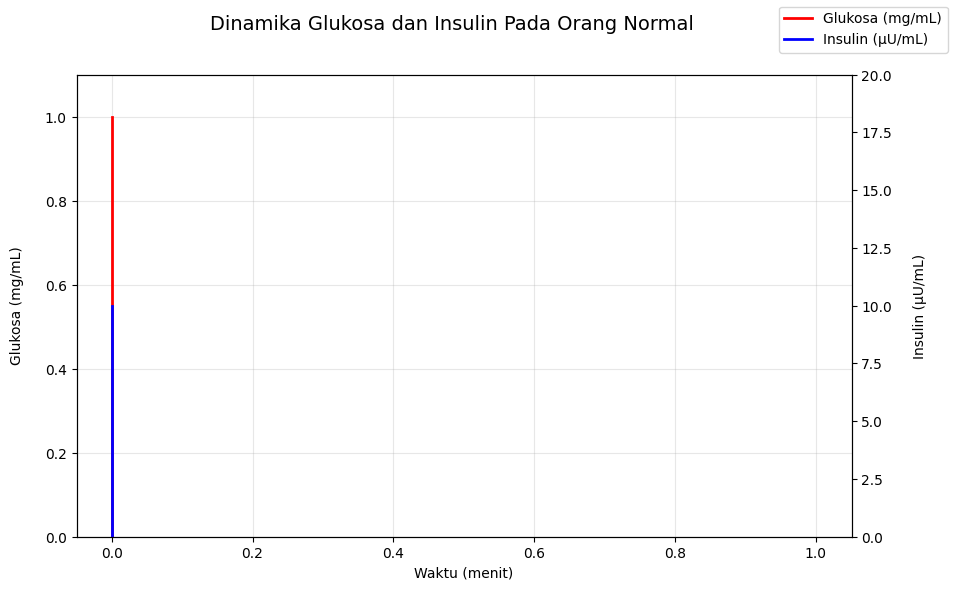

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi fungsi untuk sistem persamaan
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
    dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter-parameter baru yang lebih rendah
alpha = 2.5    # Penerimaan glukosa lebih lambat
gamma = 0.00005 # Penggunaan glukosa lebih perlahan tanpa insulin
theta = 0.0002 # Pengaruh insulin pada glukosa lebih rendah
delta = 0.1    # Sekresi insulin lebih lambat
beta = 200     # Penghapusan insulin lebih lambat

# Waktu simulasi
t = np.linspace(0, 500, 1000)

# Kondisi awal [Glukosa (G), Insulin (I)]
z0 = [100, 10]

# Simulasi dengan parameter baru
params = (alpha, gamma, theta, delta, beta)
z_adjusted = runge_kutta_4(f, z0, t, params)

# Ekstrak Glukosa dan Insulin
glucose = z_adjusted[:, 0]  # Ambil nilai glukosa
insulin = z_adjusted[:, 1]  # Ambil nilai insulin

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)

# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
ax1.grid(alpha=0.3)

plt.show()


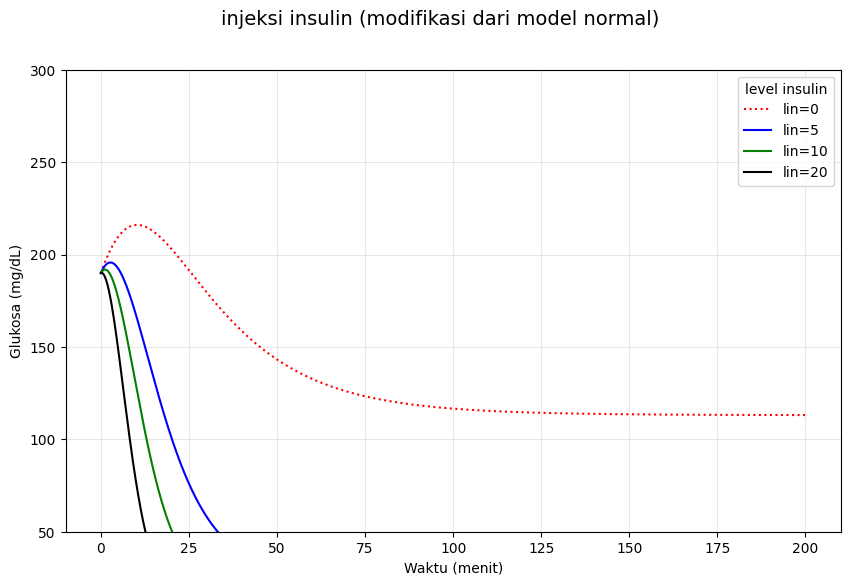

In [ ]:
#what did you expect ? no brief no discuss

def f(z, t, alpha, gamma, theta, delta, beta, I_inj):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # perubahan kadar glukosa (mg/dL/min)
    dIdt = delta * G - beta * I * G + I_inj   # insulin dipengaruhi oleh injeksi insulin
    return np.array([dGdt, dIdt])

alpha = 6.5
gamma = 0.0055
theta = 0.0012
delta = 0.013
beta = 0.0003

t = np.linspace(0, 200, 3000)

insulin_injections = [0, 5, 10, 20]
colors = ['red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, I_inj in enumerate(insulin_injections):
    z0 = [190.0, I_inj]
    params = (alpha, gamma, theta, delta, beta, I_inj)
    solution = runge_kutta_4(f, z0, t, params)
    glucose_converted = solution[:, 0]
    ax1.plot(t, glucose_converted, color=colors[i], label=f'lin={I_inj}', linestyle='dotted' if I_inj == 0 else '-')

ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/dL)', color='black')
ax1.set_ylim(50, 300)
ax1.legend(loc="upper right", title="level insulin")
ax1.grid(alpha=0.3)

fig.suptitle('injeksi insulin (modifikasi dari model normal)', fontsize=14)
plt.show()